In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 주제 : 서울시 구별 CCTV 현황 분석

#### 부제 : 

- https://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do
- https://data.seoul.go.kr/dataList/11067/S/2/datasetView.do

## 1. Data Definition

### (1) CCTV Load

In [2]:
cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### (2) Population Load

In [3]:
pd.read_excel("data/seoul/Report.xls")

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.1/4,합계,4237610,10112070,4948481,5163589,9838892,4817507,5021385,273178,130974,142204,2.32,1382420
3,2018.1/4,종로구,73879,164348,79962,84386,154549,75749,78800,9799,4213,5586,2.09,26429
4,2018.1/4,중구,60903,135139,66582,68557,126082,62376,63706,9057,4206,4851,2.07,21655
5,2018.1/4,용산구,108497,245411,119985,125426,229909,111262,118647,15502,8723,6779,2.12,37238
6,2018.1/4,성동구,134543,314551,154672,159879,306532,150937,155595,8019,3735,4284,2.28,41752
7,2018.1/4,광진구,161407,371671,180206,191465,357149,173946,183203,14522,6260,8262,2.21,44470
8,2018.1/4,동대문구,160489,364962,180381,184581,349308,174476,174832,15654,5905,9749,2.18,56284
9,2018.1/4,중랑구,179600,411552,204411,207141,406868,202526,204342,4684,1885,2799,2.27,59992


In [4]:
pd.read_excel("data/seoul/Report.xls", usecols="B, D, G, J, N") # 원하는 컬럼만 가져오겠다.

,자치구,인구,인구.3,인구.6,65세이상고령자
0,자치구,합계,한국인,등록외국인,65세이상고령자
1,자치구,계,계,계,65세이상고령자
2,합계,10112070,9838892,273178,1382420
3,종로구,164348,154549,9799,26429
4,중구,135139,126082,9057,21655
5,용산구,245411,229909,15502,37238
6,성동구,314551,306532,8019,41752
7,광진구,371671,357149,14522,44470
8,동대문구,364962,349308,15654,56284
9,중랑구,411552,406868,4684,59992


In [5]:
pop_seoul = pd.read_excel("data/seoul/Report.xls", usecols="B, D, G, J, N",
             header=2) # 2번째를 제목으로 해라.(다중컬럼일 때 윗부분을 생략)

pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### (3) EDA & Preprocessing

#### (1) 컬럼 이름 변경

- CCTV자료에서 "기관명"이라는 컬럼을 "구별"로 변경

In [6]:
cctv_seoul.rename(columns={"기관명":"구별"}, inplace=True) # 원하는 컬럼 하나만 이름 변경하는 함수 rename()
cctv_seoul.head()
#ctv_seoul.columns = ["구별", "소계", "2013년도 이전", "2014년", "2015년", "2016년"] # 컬럼 전체의 이름을 재지정

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


- 인구 자료에서 컬럼명은 각각 "구별", "소계", "한국인", "외국인", "고령자"로 변경

In [7]:
pop_seoul.columns = ["구별", "인구수", "한국인", "외국인", "고령자"]
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


#### 2) CCTV

- 어느 구가 가장 많이 설치되어 있는가? 또는 가장 적게 설치되어 있는가?

In [8]:
print(cctv_seoul["구별"][cctv_seoul["소계"] == cctv_seoul["소계"].max()])
print(cctv_seoul["구별"][cctv_seoul["소계"] == cctv_seoul["소계"].min()])

0    강남구
Name: 구별, dtype: object
9    도봉구
Name: 구별, dtype: object


In [9]:
cctv_seoul.sort_values(by="소계") # 오름차순으로 정렬하겠다.
cctv_seoul.sort_values(by="소계", ascending=False) # 내림차순으로 보겠다.
cctv_seoul.sort_values(by="소계", ascending=False)[["구별", "소계"]] # 구별, 소계만 보겠다.

,구별,소계
0,강남구,3238
18,양천구,2482
14,서초구,2297
4,관악구,2109
21,은평구,2108
20,용산구,2096
6,구로구,1884
10,동대문구,1870
16,성북구,1651
22,종로구,1619


#### 3) "최근 증가율"이라는 파생변수를 추가

- (2014 + 2015 + 2016 / 2013년도 이전 * 100
- cctv 설치 증가율에 따라 가장 높은 구와 가장 적은 구를 탐색

In [10]:
cctv_seoul["최근 증가율"] = ((cctv_seoul["2014년"]+cctv_seoul["2015년"]+cctv_seoul["2016년"]) / cctv_seoul["2013년도 이전"])*100
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [11]:
print(cctv_seoul.sort_values(by="최근 증가율")[:][0:3])

print(cctv_seoul.sort_values(by="최근 증가율", ascending=False).head(3))

      구별    소계  2013년도 이전  2014년  2015년  2016년     최근 증가율
18   양천구  2482       1843    142     30    467  34.671731
13  서대문구  1254        844     50     68    292  48.578199
20   용산구  2096       1368    218    112    398  53.216374
     구별    소계  2013년도 이전  2014년  2015년  2016년      최근 증가율
22  종로구  1619        464    314    211    630  248.922414
9   도봉구   825        238    159     42    386  246.638655
12  마포구   980        314    118    169    379  212.101911


#### 4) CCTV Data 중간 Checkpoint

In [12]:
cctv_seoul.to_csv("data/seoul/cctv_seoul.csv", encoding="utf-8")

In [13]:
cctv_seoul = pd.read_csv("data/seoul/cctv_seoul.csv")
del cctv_seoul["Unnamed: 0"]
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780
5,광진구,878,573,78,53,174,53.228621
6,구로구,1884,1142,173,246,323,64.973730
7,금천구,1348,674,51,269,354,100.000000
8,노원구,1566,542,57,451,516,188.929889
9,도봉구,825,238,159,42,386,246.638655


#### 5) 인구 데이터에서 전처리

In [14]:
#### 필요없는 행 삭제(여기서는 첫번쨰 행) : drop(), del

#pop_seoul.drop([0]) #원하는 위치의 행을 제거 # 원본에서 제거된 것은 아님.
#pop_seoul.drop([0], inplace=True) # 원본에서 제거
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


In [15]:
### 구별 데이터의 중복이나 결측치 등을 확인

# 결측치 확인
pop_seoul.info() # 구별과 다른 컬럼의 수량이 다른 것을 확인
pop_seoul["구별"].unique() # nan값이 있는걸 확인
pop_seoul[pop_seoul["구별"].isnull()] # 몇번째 값이 결측치인지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      26 non-null     object
 1   인구수     27 non-null     int64 
 2   한국인     27 non-null     int64 
 3   외국인     27 non-null     int64 
 4   고령자     27 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ KB


,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [16]:
# 중복값 확인
pop_seoul["구별"].value_counts()

합계      1
종로구     1
송파구     1
강남구     1
서초구     1
관악구     1
동작구     1
영등포구    1
금천구     1
구로구     1
강서구     1
양천구     1
마포구     1
서대문구    1
은평구     1
노원구     1
도봉구     1
강북구     1
성북구     1
중랑구     1
동대문구    1
광진구     1
성동구     1
용산구     1
중구      1
강동구     1
Name: 구별, dtype: int64

In [17]:
#### 결측치 삭제

pop_seoul.drop([26], inplace=True)
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      26 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


#### 6) 인구데이터 현황

In [18]:
##### 구별로 인구 수 탐색(전체, 외국인, 고령자)

print(pop_seoul.sort_values("인구수", ascending=False).head(3))
print(pop_seoul.sort_values("인구수").head(3))
print("===========================================================")
print(pop_seoul.sort_values("외국인", ascending=False).head(3))
print(pop_seoul.sort_values("외국인").head(3))
print("===========================================================")
print(pop_seoul.sort_values("고령자", ascending=False).head(3))
print(pop_seoul.sort_values("고령자").head(3))

     구별       인구수      한국인     외국인      고령자
0    합계  10112070  9838892  273178  1382420
24  송파구    671994   665282    6712    77978
16  강서구    608361   601696    6665    77381
    구별     인구수     한국인    외국인    고령자
2   중구  135139  126082   9057  21655
1  종로구  164348  154549   9799  26429
3  용산구  245411  229909  15502  37238
      구별       인구수      한국인     외국인      고령자
0     합계  10112070  9838892  273178  1382420
19  영등포구    403988   369128   34860    54704
17   구로구    440396   408369   32027    59838
     구별     인구수     한국인   외국인    고령자
10  도봉구  345041  342861  2180  54293
9   강북구  327511  323862  3649  57002
15  양천구  473087  469221  3866  56070
     구별       인구수      한국인     외국인      고령자
0    합계  10112070  9838892  273178  1382420
24  송파구    671994   665282    6712    77978
16  강서구    608361   601696    6665    77381
     구별     인구수     한국인    외국인    고령자
2    중구  135139  126082   9057  21655
1   종로구  164348  154549   9799  26429
18  금천구  253344  234238  19106  34640


In [19]:
##### 전체 인구 대비 외국인 비율, 고령자 비율 파생변수 추가해서 순위 확인

pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["인구수"] * 100
pop_seoul["고령자비율"] = pop_seoul["고령자"] / pop_seoul["인구수"] * 100

In [20]:
pop_seoul

print(pop_seoul.sort_values("외국인비율", ascending=False).head(3))
print(pop_seoul.sort_values("외국인비율").head(3))
print("===========================================================")
print("===========================================================")
print("===========================================================")
print(pop_seoul.sort_values("고령자비율", ascending=False).head(3))
print(pop_seoul.sort_values("고령자비율").head(3))

      구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
19  영등포구  403988  369128  34860  54704  8.628969  13.540996
18   금천구  253344  234238  19106  34640  7.541525  13.673109
17   구로구  440396  408369  32027  59838  7.272319  13.587317
     구별     인구수     한국인   외국인    고령자     외국인비율      고령자비율
10  도봉구  345041  342861  2180  54293  0.631809  15.735231
11  노원구  555803  551902  3901  75081  0.701867  13.508563
15  양천구  473087  469221  3866  56070  0.817186  11.851943
    구별     인구수     한국인   외국인    고령자     외국인비율      고령자비율
9  강북구  327511  323862  3649  57002  1.114161  17.404606
1  종로구  164348  154549  9799  26429  5.962348  16.081121
2   중구  135139  126082  9057  21655  6.701988  16.024242
     구별     인구수     한국인   외국인    고령자     외국인비율      고령자비율
24  송파구  671994  665282  6712  77978  0.998818  11.603973
23  강남구  557865  552976  4889  65859  0.876377  11.805544
15  양천구  473087  469221  3866  56070  0.817186  11.851943


In [21]:
print(pop_seoul.sort_values("외국인비율", ascending=False).round(1).head(3))
print(pop_seoul.sort_values("고령자비율", ascending=False).round(1).head(3))

      구별     인구수     한국인    외국인    고령자  외국인비율  고령자비율
19  영등포구  403988  369128  34860  54704    8.6   13.5
18   금천구  253344  234238  19106  34640    7.5   13.7
17   구로구  440396  408369  32027  59838    7.3   13.6
    구별     인구수     한국인   외국인    고령자  외국인비율  고령자비율
9  강북구  327511  323862  3649  57002    1.1   17.4
1  종로구  164348  154549  9799  26429    6.0   16.1
2   중구  135139  126082  9057  21655    6.7   16.0


### (4) Final Analysis

#### 1) 인구 대비 CCTV 설치 현황

In [22]:
##### CCTV 데이터와 인구 데이터를 합치기


data_result = pd.merge(pop_seoul, cctv_seoul, on="구별") # 공통되는 컬럼이 1개 뿐이면 생략해도 되지만, 2개이상일 경우 on=""으로 적어줘야한다.
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621


In [23]:
##### 필요업슨 컬럼 삭제
# del data_result["2013년도 이전"]
# del data_result["2014년"]
# del data_result["2015년"]
# del data_result["2016년"]
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621


In [24]:
data_result.set_index("구별", inplace=True)

In [25]:
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
구별,,,,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414
중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822
광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621


- cctv개수(소계)와 인구 데이터의 3가지 변수(인구수, 고령자, 외국인)과 관계가 있는지 확인

- 상관 계수 : -1 ~ 1

In [26]:
print(np.corrcoef(data_result["외국인비율"], data_result["소계"]))
print("===========================================================")
print("===========================================================")
print(np.corrcoef(data_result["고령자비율"], data_result["소계"]))
print("===========================================================")
print("===========================================================")
print(np.corrcoef(data_result["인구수"], data_result["소계"]))

# 0.2이하는 관계가 거의 없다
# 0.2~0.4는 미약한 관계가 있다
# 0.4~0.6은 어느정도 관계가 있다
# 0.7~ 꽤나 관계가 있다
# 0.9~ 매우 큰 관계가 있다

[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


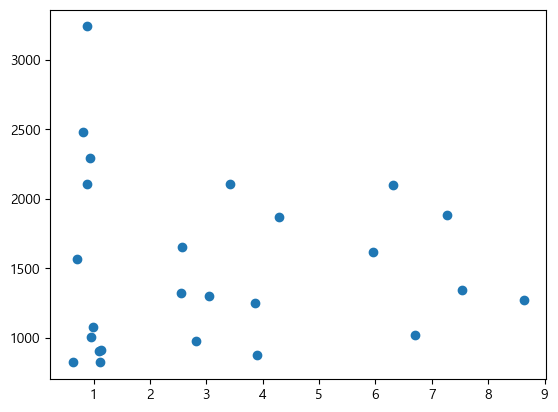

In [27]:
plt.scatter(data_result["외국인비율"], data_result["소계"])

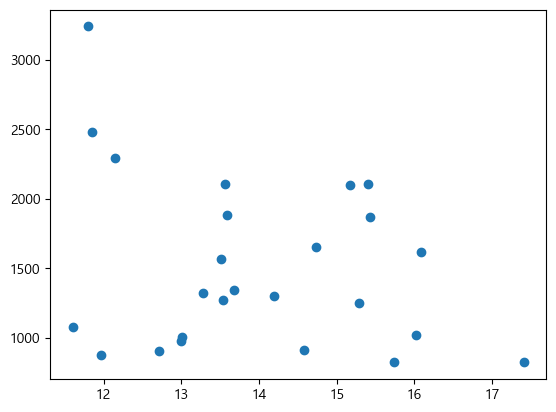

In [28]:
plt.scatter(data_result["고령자비율"], data_result["소계"])

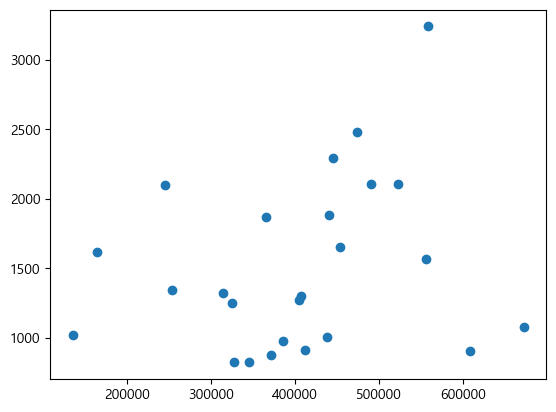

In [29]:
plt.scatter(data_result["인구수"], data_result["소계"])

#### 2) 중간 Checkpoint

In [30]:
data_result.to_csv("data/seoul/cctv_result.csv", encoding="utf-8")

In [31]:
data_result = pd.read_csv("data/seoul/cctv_result.csv", index_col="구별")  # 불러오면서 바로 인덱스 지정
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
구별,,,,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414
중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822
광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621


#### 3) Visualization

<AxesSubplot:ylabel='구별'>

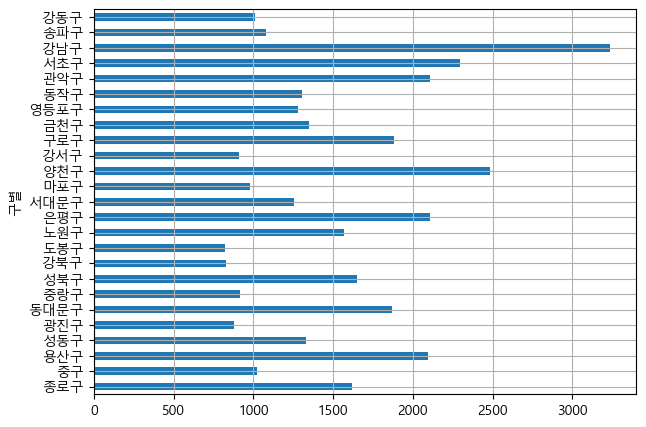

In [32]:
#### cctv가 가장 많이 설치된 구

data_result["소계"].plot(kind="barh", figsize=(7, 5), grid=True)

In [33]:
#### 인구 대비 cctv 개수를 확인

# 'CCTV비율' 파생변수 추가 : (소계 / 인구수) * 100

data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,CCTV비율
구별,,,,,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414,0.985105
중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758,0.756998
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374,0.854077
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822,0.421871
광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621,0.236230
동대문구,364962,349308,15654,56284,4.289214,15.421880,1870,1070,23,198,579,74.766355,0.512382
중랑구,411552,406868,4684,59992,1.138131,14.577016,916,509,121,177,109,79.960707,0.222572
성북구,453902,442226,11676,66896,2.572361,14.737983,1651,1009,78,360,204,63.627354,0.363735
강북구,327511,323862,3649,57002,1.114161,17.404606,831,369,120,138,204,125.203252,0.253732


<AxesSubplot:ylabel='구별'>

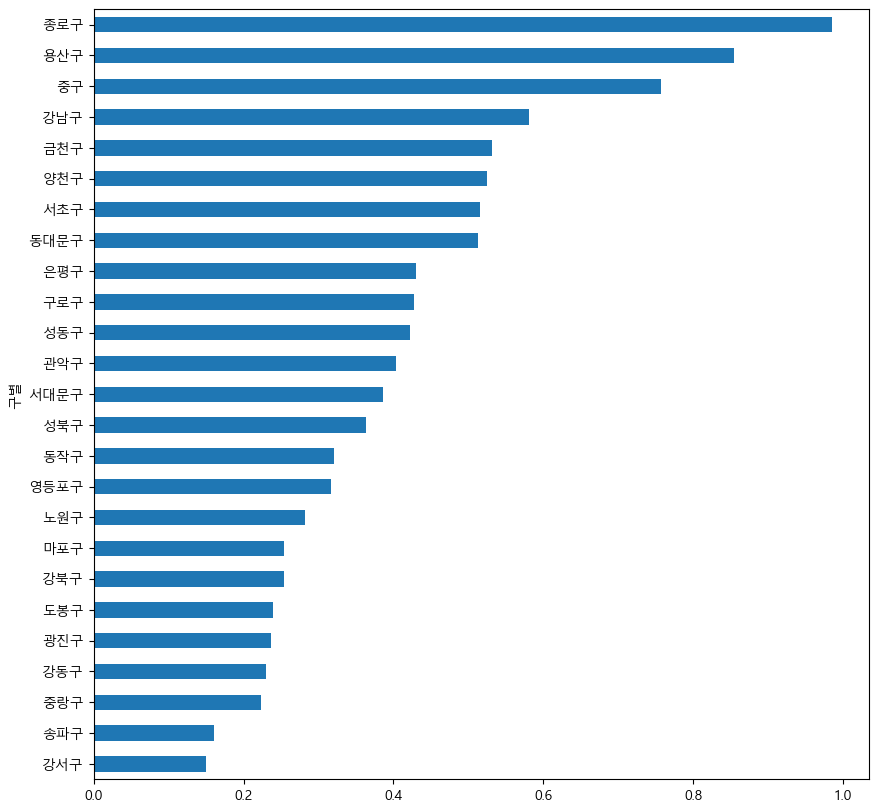

In [34]:
data_result["CCTV비율"].sort_values().plot(kind="barh", figsize = (10, 10))

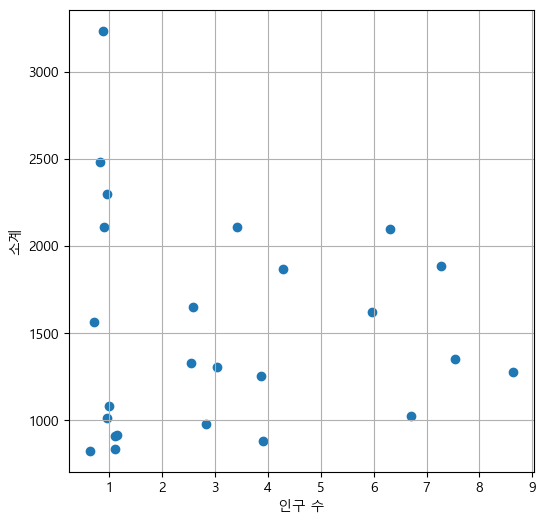

In [35]:
#### CCTV 갯수와 인구 수가 서로 관계가 있는지 확인
plt.figure(figsize = (6, 6))
plt.scatter(data_result["외국인비율"], data_result["소계"])
plt.xlabel("인구 수")
plt.ylabel("소계")
plt.grid() 

# 회귀선을 하나 그려보자 # 평균보다 많이 설치된 곳은 어디인가? 적게 설치된 곳은 어디인가
####  y = ax + b

 
0.001104 x + 1069


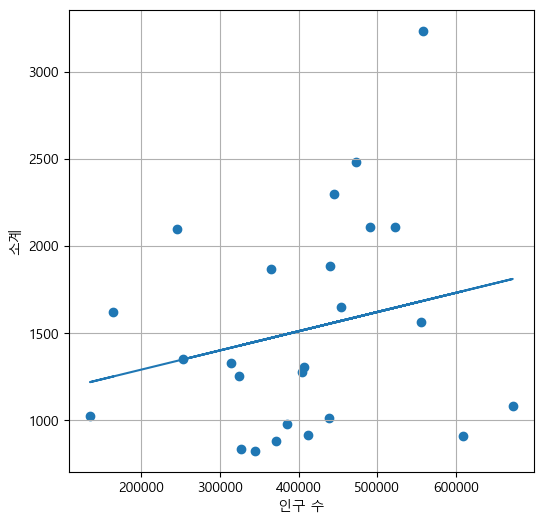

In [36]:
#### y = ax + b

# np.polyfit(x, y, deg) # deg = 몇차원인지

pf = np.polyfit(data_result["인구수"], data_result["소계"], 1)
# array([1.10432363e-03, 1.06864009e+03]) x기울기, 절편

pf[0] * 350000 + pf[1] # pf의 0번째 값 = x 기울기, pf의 1번째값 = 절편

p1 = np.poly1d(pf) # 방정식으로 만들어주는 함수
# poly1d([1.10432363e-03, 1.06864009e+03])
print(p1) # 0.001104 x + 1069 # print해보면 이렇게 예쁘게 만들어줌.

plt.figure(figsize = (6, 6))
plt.scatter(data_result["인구수"], data_result["소계"])
#plt.plot(data_result["인구수"], p1(data_result["인구수"]))
plt.plot(data_result["인구수"], pf[0]*data_result["인구수"]+pf[1]) # 복습필요
plt.xlabel("인구 수")
plt.ylabel("소계")
plt.grid() 


In [37]:
?np.polyfit

In [38]:
pf

array([1.10432363e-03, 1.06864009e+03])

#### x축의 범위를 지정하고 선을 꾸며보자

- np.linspace(시작범위, 끝범위, 몇개)
- np.linspace(100000, 700000, 10)
- plt.plot(fx, pf[0]*fx+pf[1], lw = 3, color="g", ls="dashed")
- lw = line width : 선 넓이, 폭, (float으로 입력)
- color = 선 색상
- ls = line style : {'-', '--', '-.', ':', '', dashed, (offset, on-off-seq), ...}

 
0.001104 x + 1069


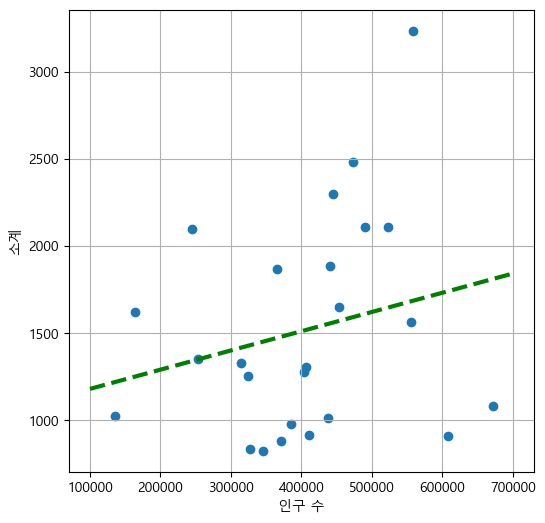

In [39]:

fx = np.linspace(100000, 700000, 100)

pf = np.polyfit(data_result["인구수"], data_result["소계"], 1)
# array([1.10432363e-03, 1.06864009e+03]) x기울기, 절편

pf[0] * 350000 + pf[1] # pf의 0번째 값 = x 기울기, pf의 1번째값 = 절편

p1 = np.poly1d(pf) # 방정식으로 만들어주는 함수
# poly1d([1.10432363e-03, 1.06864009e+03])
print(p1) # 0.001104 x + 1069 # print해보면 이렇게 예쁘게 만들어줌.

plt.figure(figsize = (6, 6))
plt.scatter(data_result["인구수"], data_result["소계"])
# plt.plot(data_result["인구수"], p1(data_result["인구수"]))
# plt.plot(data_result["인구수"], pf[0]*data_result["인구수"]+pf[1]) # 복습필요
plt.plot(fx, pf[0]*fx+pf[1], lw = 3, color="g", ls="dashed")
plt.xlabel("인구 수")
plt.ylabel("소계")
plt.grid() 


In [40]:
##### 각 데이터의 오차를 구해서 "오차"라는 파생변수 추가

data_result["오차"] = data_result["소계"] - p1(data_result["인구수"])
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414,0.985105,368.866533
중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758,0.756998,-194.877278
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374,0.854077,756.346747
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822,0.421871,-89.006188
광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621,0.236230,-601.085154


In [41]:
df_sort = data_result.sort_values(by="오차", ascending=False) # 오차를 기준으로 내림차순 # 강남구 금천구 강서구 위치 및 값 확인
df_sort.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,1292,430,584,932,150.619195,0.580427,1553.296412
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,1843,142,30,467,34.671731,0.524639,890.918761
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374,0.854077,756.346747
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,1406,157,336,398,63.371266,0.515990,736.754790
은평구,490253,485902,4351,75535,0.887501,15.407351,2108,1138,224,278,468,85.237258,0.429982,497.961942


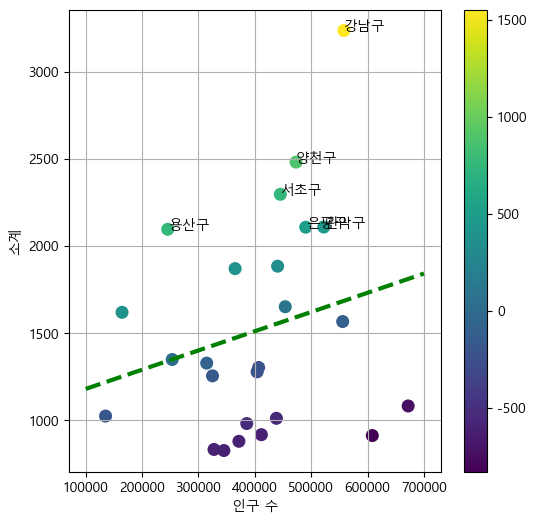

In [42]:
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize = (6, 6))

plt.scatter(data_result["인구수"], data_result["소계"], c=data_result["오차"], s=70) # c색깔을 값에 맞게 변화 # s는 사이즈
plt.plot(fx, pf[0]*fx+pf[1], lw = 3, color="g", ls="dashed")

plt.xlabel("인구 수")
plt.ylabel("소계")
plt.grid() 
plt.colorbar() # 그래프 옆에 컬러바 만들기

for i in range(6):
    plt.text(df_sort["인구수"][i], df_sort["소계"][i], df_sort.index[i])
    
# plt.text(x, y, value)
# plt.text(df_sort에서 뽑은 인구수 값을 x, df_sort의 소계의 값을 y, 강남구 등을 표시하고 싶으니 index로)

In [43]:
##### 지도를 이용하여 CCTV현황 파악
# https://github.com/southkorea/southkorea-maps # 한국 지도

import folium

map = folium.Map(location=[37.4987464, 127.03169], zoom_start=10)

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map.choropleth(geo_data=geo_path, data=data_result["소계"], key_on="feature.id",
              columns=[data_result.index, data_result["소계"]], fill_color="YlGn")

map

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [44]:
##### 최종 결과물 저장

df_sort.to_csv("data/seoul/cctv_result.csv", encoding="utf-8")